In [ ]:
# I'm Gonna try to make the FF into the IPYNB file and see what happens

import sys
from importlib import reload

import numpy as np
from matplotlib import pyplot as plt
import jax
from jax import numpy as jnp

sys.path.append("..")
import FF
import solvers
import utils

reload(FF)
reload(solvers)
reload(utils)

jax.config.update("jax_platform_name", "cpu")
jax.config.update("jax_enable_x64", True)

jndarray = jnp.ndarray

In [ ]:
def get_initial_values():
    # Initial true state
    u0 = jnp.array([-2.0, 0.0])

    # Initial simulation state
    un0 = jnp.zeros_like(u0)

    return u0, un0

#TODO Change the c1s...etc to a,b,c,d to A,B,C,D
#TODO Add in graph for 4th parameter
def plot(c1s, c2s, c3s, c4s, u_errors, g1, g2, g3, g4, tls):
    num_iters = len(c1s)
    ils = np.arange(num_iters)

    fig, axs = plt.subplots(3, 2, figsize=(10, 8))

    ax = axs[0, 0]
    ax.hlines(g1, ils[0], ils[-1], label="A", color="black")
    ax.plot(ils, c1s, label="a")
    ax.legend()
    ax.set_title("a vs A")
    ax.set_xlabel("Iteration number")

    ax = axs[0, 1]
    ax.hlines(g2, ils[0], ils[-1], label="B", color="black")
    ax.plot(ils, c2s, label="b")
    ax.legend()
    ax.set_title("b vs B")
    ax.set_xlabel("Iteration number")

    ax = axs[1, 0]
    ax.hlines(g3, ils[0], ils[-1], label="C", color="black")
    ax.plot(ils, c3s, label="c")
    ax.legend()
    ax.set_title("c vs C")
    ax.set_xlabel("Iteration number")

    ax = axs[1, 1]
    ax.hlines(g4, ils[0], ils[-1], label="D", color="black")
    ax.plot(ils, c4s, label="d")
    ax.legend()
    ax.set_title("d vs D")
    ax.set_xlabel("Iteration number")

    ax = axs[2, 0]
    ax.plot(tls[1:], u_errors)
    ax.set_yscale("log")
    ax.set_title("Relative error in $u$")
    ax.set_xlabel("Time")

    fig.tight_layout()

    return fig, axs

In [ ]:
# System evolution parameters
a, b, c, d = g1, g2, g3, g4 = 1, 1, 0.1, 0.75
c1, c2, c3, c4 = g1, g2, g3, g4
c1 *= 1.1
c2 *= 1.1
c3 *= 0.9
c4 *= 0.9
μ = 50

gs = jnp.array([g1, g2, g3, g4])
bs = jnp.array([])
cs = jnp.array([c1, c2, c3, c4])

observed_slice = jnp.s_[:]
system = FF.FF(μ, gs, bs, cs, observed_slice)
solver = solvers.RK4(system)
# solver = solvers.TwoStepAdamsBashforth(system, solver)

# Simulation parameters
dt = 0.01
T0, Tf = 0, 10000
t_relax = 1.0

cs, u_errors, tls, *_ = utils.run_update(
    system, solver, dt, T0, Tf, t_relax, *get_initial_values()
)

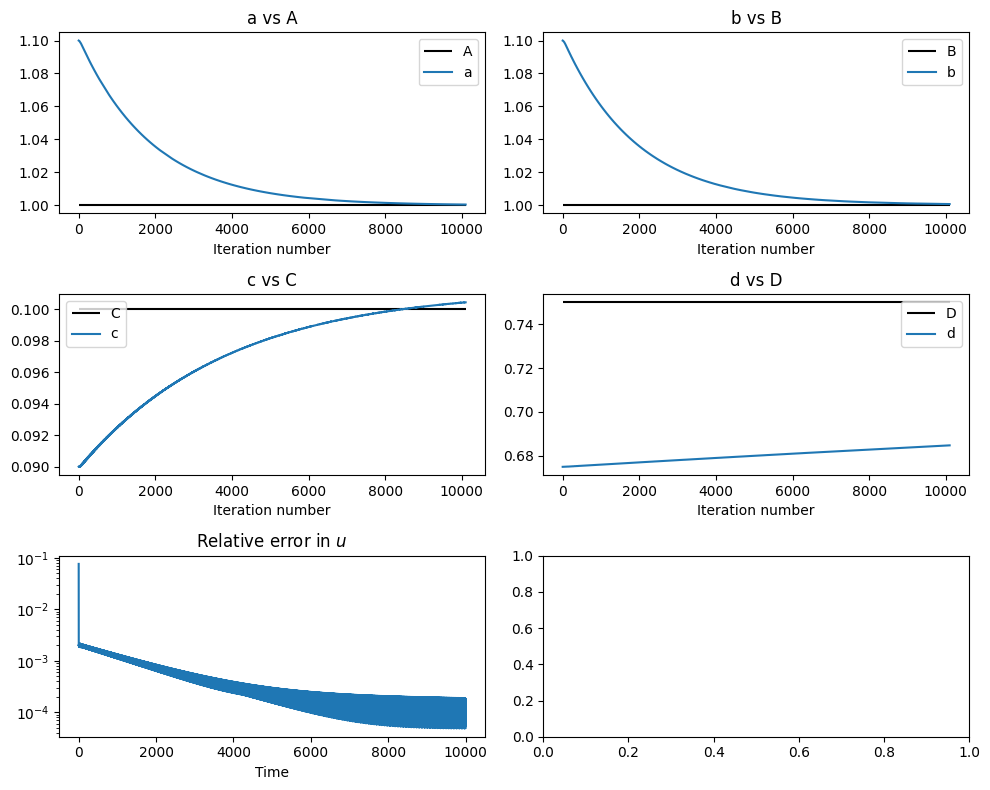

In [ ]:
fig, axs = plot(cs.T[0], cs.T[1], cs.T[2], cs.T[3], u_errors, g1, g2, g3, g4, tls)
plt.show()